# 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

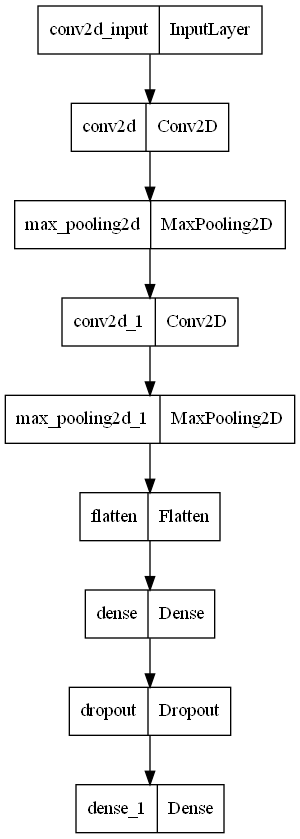

In [7]:
keras.utils.plot_model(model)

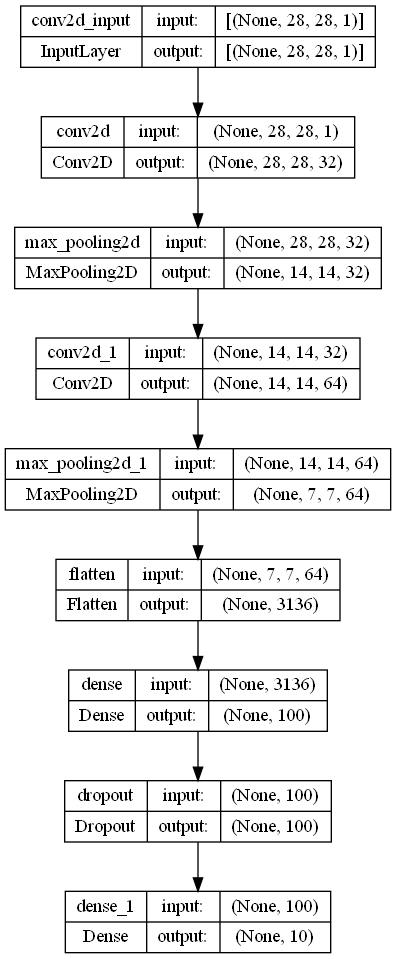

In [8]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5369 - accuracy: 0.8070 - val_loss: 0.3270 - val_accuracy: 0.8803
Epoch 2/20
  15/1500 [..............................] - ETA: 11s - loss: 0.4023 - accuracy: 0.8604

C:\Users\khj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 13s 9ms/step - loss: 0.3546 - accuracy: 0.8726 - val_loss: 0.2805 - val_accuracy: 0.8946
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3019 - accuracy: 0.8917 - val_loss: 0.2605 - val_accuracy: 0.9033
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2656 - accuracy: 0.9038 - val_loss: 0.2472 - val_accuracy: 0.9089
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2445 - accuracy: 0.9111 - val_loss: 0.2379 - val_accuracy: 0.9112
Epoch 6/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2237 - accuracy: 0.9179 - val_loss: 0.2234 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2044 - accuracy: 0.9244 - val_loss: 0.2291 - val_accuracy: 0.9182
Epoch 8/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1862 - accuracy: 0.9301 - val_loss: 0.2205 - val_accuracy: 0.9

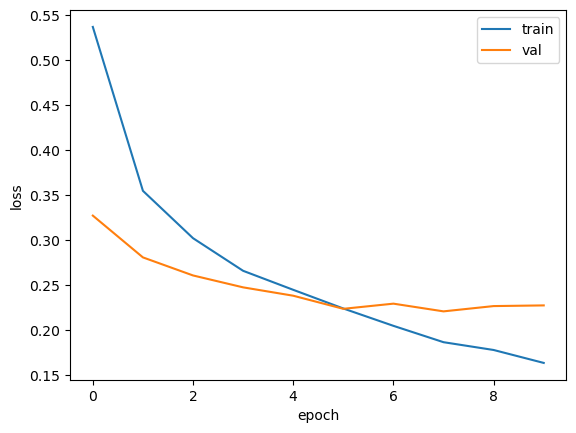

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2205 - accuracy: 0.9213


[0.22051511704921722, 0.9213333129882812]

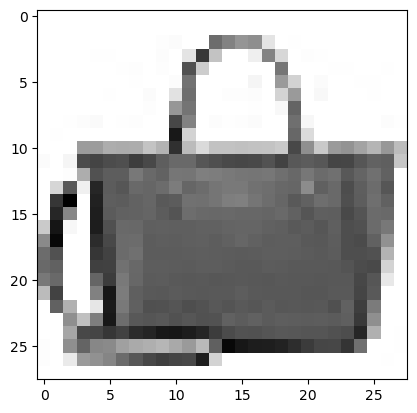

In [12]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 50ms/step
[[4.6692342e-14 2.2320887e-20 1.1893700e-15 2.7599827e-15 1.2779788e-14
  5.6011155e-14 4.0213156e-15 1.6170650e-13 1.0000000e+00 7.1008915e-15]]


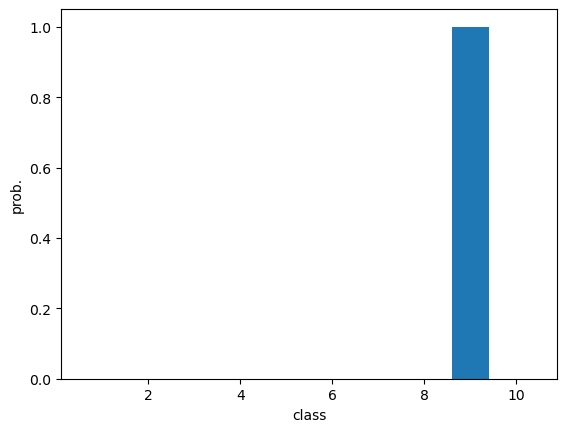

In [14]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달', '셔츠','스니커즈','가방','앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2409 - accuracy: 0.9157


[0.24090144038200378, 0.9157000184059143]